In [16]:
from corpus import load_meta_data
from features import load_features

In [17]:
meta_data = load_meta_data()
target = meta_data.guten_genre
target

book_id
pg10067                    Detective and Mystery
pg1032                                  Literary
pg10379                                 Literary
pg10473                          Western Stories
pg10812                                 Literary
                                   ...          
pg766DickensDavidCopfld                 Literary
pg786DickensHardTimes                   Literary
pg834DoyleMemoirsSherlk    Detective and Mystery
pg863Agatha1               Detective and Mystery
pg98DickensTaleCities                   Literary
Name: guten_genre, Length: 996, dtype: object

In [18]:
import pandas as pd
import numpy as np
test_features = pd.read_csv('feature_collection_test.csv', index_col='book_id')
test_features
train_features = pd.read_csv('feature_collection_train.csv', index_col='book_id')
features = pd.concat([test_features, train_features])
features

,title_word_count,title_avg_word_length,._count,!_count,?_count,",_count",``_count,length,proper_names,pos_sentiment,...,sim_alle,sim_cs,sim_dam,sim_gah,sim_hawas,sim_lit,sim_lar,sim_saa,sim_ws,genre
book_id,,,,,,,,,,,,,,,,,,,,,
pg45872,10,5.300000,0.033696,0.007266,0.004759,0.075461,0.011671,31102,0.004148,0.206,...,0.742523,0.748322,0.579421,0.663586,0.646964,0.698508,0.667211,0.603866,0.535087,Literary
pg28229,3,7.333333,0.047042,0.004682,0.007283,0.055153,0.023887,94193,0.006338,0.097,...,0.447812,0.571451,0.569140,0.510027,0.755611,0.574220,0.520410,0.546148,0.711486,Detective and Mystery
pg141JaneAusMansPark,2,6.500000,0.031834,0.002648,0.002535,0.066698,0.008779,185777,0.002024,0.175,...,0.428327,0.585740,0.601423,0.543110,0.487179,0.518003,0.454815,0.476121,0.480471,Literary
pg6311,6,4.833333,0.033743,0.001477,0.003150,0.059649,0.011194,168569,0.001845,0.153,...,0.516512,0.607966,0.592284,0.631435,0.468571,0.526865,0.512599,0.509943,0.555111,Literary
pg8569,3,4.333333,0.045115,0.002068,0.003316,0.070813,0.011944,140242,0.004072,0.152,...,0.571639,0.540852,0.627999,0.782797,0.559516,0.590925,0.547365,0.602597,0.566436,Literary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pg26925,9,5.111111,0.055841,0.006337,0.008419,0.051555,0.028992,32664,0.003613,0.087,...,0.711780,0.574537,0.567079,0.510136,0.661385,0.663802,0.548483,0.693251,0.680050,Detective and Mystery
pg18449,8,4.500000,0.028041,0.015770,0.005065,0.057431,0.020503,207483,0.004097,0.168,...,0.513700,0.596146,0.633410,0.577274,0.569188,0.517918,0.478184,0.556694,0.553528,Literary
pg42492,11,4.545455,0.029956,0.004129,0.002635,0.063763,0.014510,68300,0.005242,0.168,...,0.490621,0.658467,0.587030,0.647903,0.669834,0.489890,0.597267,0.807171,0.563678,Literary


In [19]:
del test_features['genre']
del train_features['genre']

In [20]:
from numpy import std, mean
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.decomposition import PCA, KernelPCA
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.utils.multiclass import type_of_target
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

,title_word_count,title_avg_word_length,._count,!_count,?_count,",_count",``_count,length,proper_names,pos_sentiment,...,point_of_view,sim_alle,sim_cs,sim_dam,sim_gah,sim_hawas,sim_lit,sim_lar,sim_saa,sim_ws
book_id,,,,,,,,,,,,,,,,,,,,,
pg42498,8.0,3.500000,0.052063,0.004276,0.006114,0.054089,0.014160,53320.0,0.004051,0.118,...,0.490208,0.460848,0.490009,0.584440,0.570570,0.572571,0.937600,0.462386,0.463935,0.558248
pg10826,12.0,5.166667,0.027038,0.003789,0.003092,0.075475,0.000940,32991.0,0.013246,0.172,...,0.407104,0.759352,0.608905,0.601187,0.710198,0.613400,0.589482,0.697718,0.755497,0.554035
pg35203,5.0,4.000000,0.048321,0.003331,0.005378,0.060796,0.025608,94266.0,0.005421,0.126,...,0.510638,0.526728,0.540875,0.581651,0.637364,0.684344,0.518021,0.628442,0.640789,0.599059
pg30089,2.0,7.500000,0.022353,0.001659,0.002320,0.069334,0.008874,86206.0,0.005754,0.127,...,0.281425,0.492040,0.573702,0.589556,0.502381,0.677819,0.495844,0.530947,0.670764,0.644003
pg16137,2.0,4.500000,0.050427,0.012324,0.010092,0.064565,0.033459,150514.0,0.002937,0.145,...,0.477709,0.686727,0.538265,0.636642,0.557538,0.597078,0.567193,0.515776,0.536888,0.504502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pg32840,3.0,3.000000,0.032977,0.004219,0.006162,0.078902,0.020381,249601.0,0.005329,0.135,...,0.509738,0.520124,0.550538,0.640425,0.608440,0.574762,0.559729,0.535728,0.602674,0.532439
pg26925,9.0,5.111111,0.055841,0.006337,0.008419,0.051555,0.028992,32664.0,0.003613,0.087,...,0.455677,0.711780,0.574537,0.567079,0.510136,0.661385,0.663802,0.548483,0.693251,0.680050
pg18449,8.0,4.500000,0.028041,0.015770,0.005065,0.057431,0.020503,207483.0,0.004097,0.168,...,0.464997,0.513700,0.596146,0.633410,0.577274,0.569188,0.517918,0.478184,0.556694,0.553528


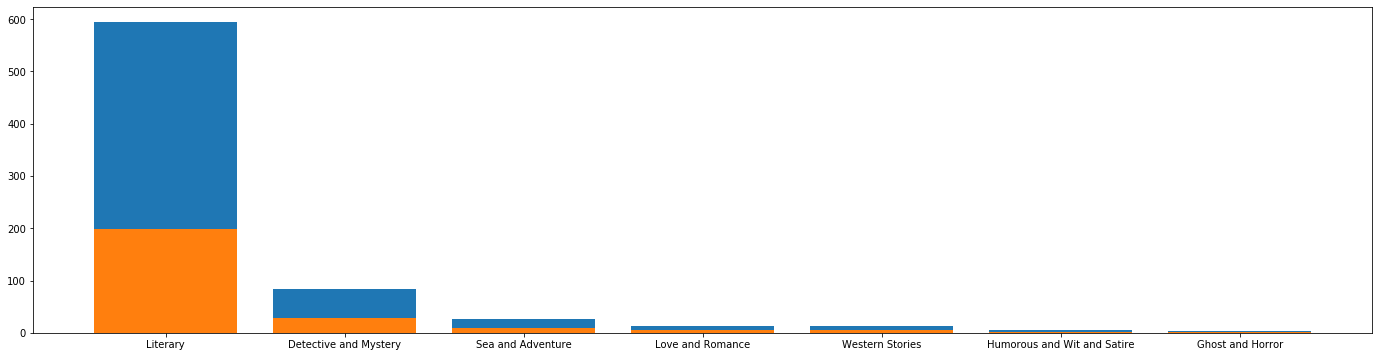

In [21]:
import maEva
(X_train, X_test) = maEva.GetTrainTestFromSplit(train_features, test_features, target, draw_plot = True, use_pca = False,
                                                            over_sample = False)
y_train = target[X_train.index]
y_test = target[X_test.index]
X_train

In [22]:
clf = make_pipeline(StandardScaler(), SVC(decision_function_shape='ovo', gamma = 'auto', 
                                        class_weight = 'balanced', random_state = 42, verbose=False))

clf = clf.fit(X_train, y_train)


results = clf.predict(X_test)

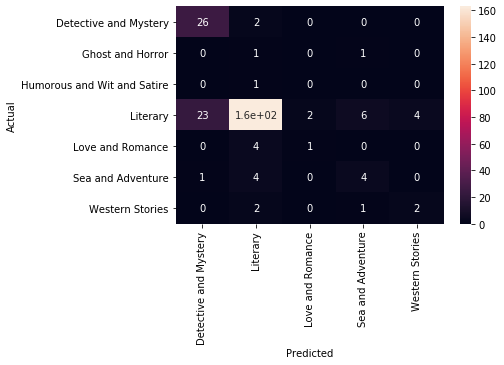

In [23]:
import seaborn as sns
cm = pd.crosstab(y_test, results, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm, annot=True)

In [24]:
from sklearn.metrics import balanced_accuracy_score
#Test set Evaluation
scores = cross_val_score(clf, X_test, y_test, cv=15, scoring='accuracy')
print("Cross-Validation Score: ", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


score, f1 = accuracy_score(y_test, results), f1_score(y_test, results, average='weighted')
# print("Accuracy:   %0.3f" % score)
print("F1-Score:   %0.3f" % f1)


print(classification_report(y_test, results))

Cross-Validation Score:  [1.         0.76470588 0.70588235 0.88235294 0.64705882 0.76470588
 0.70588235 0.76470588 0.75       0.75       0.75       0.6875
 0.8125     0.75       0.75      ]
Accuracy: 0.77 (+/- 0.16)
F1-Score:   0.796
                             precision    recall  f1-score   support

      Detective and Mystery       0.52      0.93      0.67        28
           Ghost and Horror       0.00      0.00      0.00         2
Humorous and Wit and Satire       0.00      0.00      0.00         1
                   Literary       0.92      0.82      0.87       198
           Love and Romance       0.33      0.20      0.25         5
          Sea and Adventure       0.33      0.44      0.38         9
            Western Stories       0.33      0.40      0.36         5

                   accuracy                           0.79       248
                  macro avg       0.35      0.40      0.36       248
               weighted avg       0.82      0.79      0.80       248



E:\Programme\anaconda\envs\tf\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)
E:\Programme\anaconda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
SVC.get_params(clf).keys()

dict_keys(['memory', 'steps', 'verbose'])

In [26]:
clf.score(X_test, y_test)

0.7903225806451613

In [27]:
print("Balanced Acc: {}, Adjusted Acc: {} ".format(maEva.GetAccuracy(y_test, results),
                                                                 maEva.GetAccuracy(y_test, results, adjusted = True)))

Balanced Acc: 0.3994640280354566, Adjusted Acc: 0.29937469937469935 
